In [1]:
import sys
sys.path.insert(0, '/Users/jisunan/myRepository/code-word2vec-application/analysis/05-alltogether/')
from groupcomparison_py3 import *

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import defaultdict

# Matplotlib for additional customization
%matplotlib inline
import seaborn as sns


INFO:summa.preprocessing.cleaner:'pattern' package not found; tag filters are not available for English


## Issues of interest

In [24]:
# issues = ["immigration", "terror", "energy", "racial", "economy"]
issues = ["immigration", "terror", "energy", "racial", "economy", "technology", "education", "democracy", "family", "science", "happy", "positive"]

In [3]:
name_base = "hillaryclinton"
name_other = "TheDonald"
base_path = "../05-alltogether/w2v_model/trained.%s.model.txt" % (name_base)
aligned_path = "../05-alltogether/w2v_model/aligned.%s_basedon_%s.model.txt" % (name_other, name_base)
isSgns = False
embed_A, embed_B = getEmbeds(base_path, aligned_path, isSgns)

In [4]:
embeds = {}
embeds["hillaryclinton"] = embed_A
embeds["TheDonald"] = embed_B

In [31]:
allANEWwords = defaultdict(list)
landmarks = defaultdict(lambda: defaultdict(list))
with open("../05-alltogether/landmarks_v2.txt") as fi:
    for l_cnt, l in enumerate(fi):
        axis_type, word_type, word, value = [term.strip() for term in l.split("\t")] 
        landmarks[axis_type][word_type].append(word)
        allANEWwords[axis_type].append(word)
print(landmarks.keys())

dict_keys(['valence', 'arousal', 'goodbad', 'cleanfilthy', 'favorableunfavorable', 'safedangerous'])


## Topic words for each of issues

In [23]:
common_top_words = defaultdict(list)
with open("./common_words_top30.txt") as fi:
    for line_cnt, line in enumerate(fi):
        seedword, word, cnt_hillary, cnt_donald = [term.strip() for term in line.split("\t")]
        common_top_words[seedword].append(word)
print(common_top_words.keys())

dict_keys(['immigration', 'terror', 'energy', 'racial', 'economy', 'technology', 'education', 'democracy', 'family', 'science', 'happy', 'positive'])


In [39]:
for each in common_top_words:
    print(each, common_top_words[each])

immigration ['rifle', 'swaths', 'negligent', 'percentage', 'criminals', 'immigrants', 'sampling', 'numbers', 'weighting', 'handgun', 'portions', 'dealers', 'amount', 'dealer', 'illegals', 'manufactures', 'immigration', 'firearms', 'handguns', 'murderers', 'migration', 'pistol', 'percentages', 'number', 'marketed', 'swath', 'firearm', 'rapists', 'chunks', 'weighted', 'portion', 'pistols', 'rifles', 'undocumented', 'chunk', 'amounts', 'mexicans', 'deporting', 'influx']
terror ['somalia', 'saddam', 'terrorists', 'islam', 'muslims', 'iraqi', 'gaddafi', 'libyan', 'yemen', 'honduras', 'radicalism', 'theocracy', 'terror', 'terrorist', 'qaddafi', 'extremism', 'kurdish', 'hussein', 'terrorism', 'fundamentalist', 'rebels', 'innocents', 'extremist', 'soldiers', 'isil', 'fundamentalists', 'iranian', 'kosovo', 'civilians', 'afghanistan', 'assad', 'kurds', 'radical', 'serbia', 'egypt', 'gaza', 'islamist', 'militant', 'extremists', 'pakistan']
energy ['renewable', 'tobacco', 'efficient', 'predatory',

In [32]:
# allANEWwords['goodbad']

## Similar words to Gooe and Bad in each Clinton/Trump subreddits

In [26]:
print("Hillary")
print("\tSimilar", find_similar_words(embeds["hillaryclinton"], 'good', 10))
print("\tClose", embeds["hillaryclinton"].closest('good', n=10))
print("Donald")
print("\tSimilar", find_similar_words(embeds["TheDonald"], 'good', 10))
print("\tClose", embeds["TheDonald"].closest('good', n=10))

Hillary
	Similar ['good', 'bad', 'terrible', 'horrible', 'awful', 'shitty', 'crappy', 'tame', 'apt', 'benign', 'innocuous']
	Close [(1.0, 'good'), (0.64923662, 'bad'), (0.6372965, 'great'), (0.55799192, 'decent'), (0.55248195, 'terrible'), (0.51075339, 'fantastic'), (0.49446592, 'excellent'), (0.46427834, 'better'), (0.46319956, 'shitty'), (0.45160496, 'solid')]
Donald
	Similar ['good', 'bad', 'terrible', 'horrible', 'awful', 'horrendous', 'atrocious', 'horrid', 'horrific', 'abhorrent', 'reprehensible']
	Close [(1.0, 'good'), (0.67624521, 'bad'), (0.62187022, 'decent'), (0.59740454, 'great'), (0.5765481, 'terrible'), (0.55603778, 'excellent'), (0.54360068, 'fantastic'), (0.51546526, 'better'), (0.47699249, 'best'), (0.46984676, 'amazing')]


In [27]:
print("Hillary")
print("\tSimilar", find_similar_words(embeds["hillaryclinton"], 'bad', 10))
print("\tClose", embeds["hillaryclinton"].closest('bad', n=10))
print("Donald")
print("\tSimilar", find_similar_words(embeds["TheDonald"], 'bad', 10))
print("\tClose", embeds["TheDonald"].closest('bad', n=10))

Hillary
	Similar ['bad', 'terrible', 'horrible', 'awful', 'shitty', 'crappy', 'tame', 'apt', 'benign', 'innocuous', 'damning']
	Close [(1.0, 'bad'), (0.69184232, 'terrible'), (0.64923662, 'good'), (0.57974517, 'horrible'), (0.55381703, 'shitty'), (0.54281795, 'awful'), (0.45972282, 'unfortunate'), (0.45532072, 'foolish'), (0.45298594, 'dumb'), (0.44252408, 'worse')]
Donald
	Similar ['bad', 'terrible', 'horrible', 'awful', 'horrendous', 'atrocious', 'horrid', 'horrific', 'abhorrent', 'reprehensible', 'repugnant']
	Close [(1.0, 'bad'), (0.72574723, 'terrible'), (0.67624521, 'good'), (0.65192467, 'horrible'), (0.56560063, 'awful'), (0.5326736, 'shitty'), (0.50527513, 'like'), (0.4704771, 'stupid'), (0.46906775, 'worse'), (0.44209859, 'dumb')]


## Old method - using average vector of all top/bottom words
Here, we map seed words of goodbad and valence dimensions to see whether they are in the opposite point of the line. For both Goodbad and Valence, the seed words seem to be used with different context. 

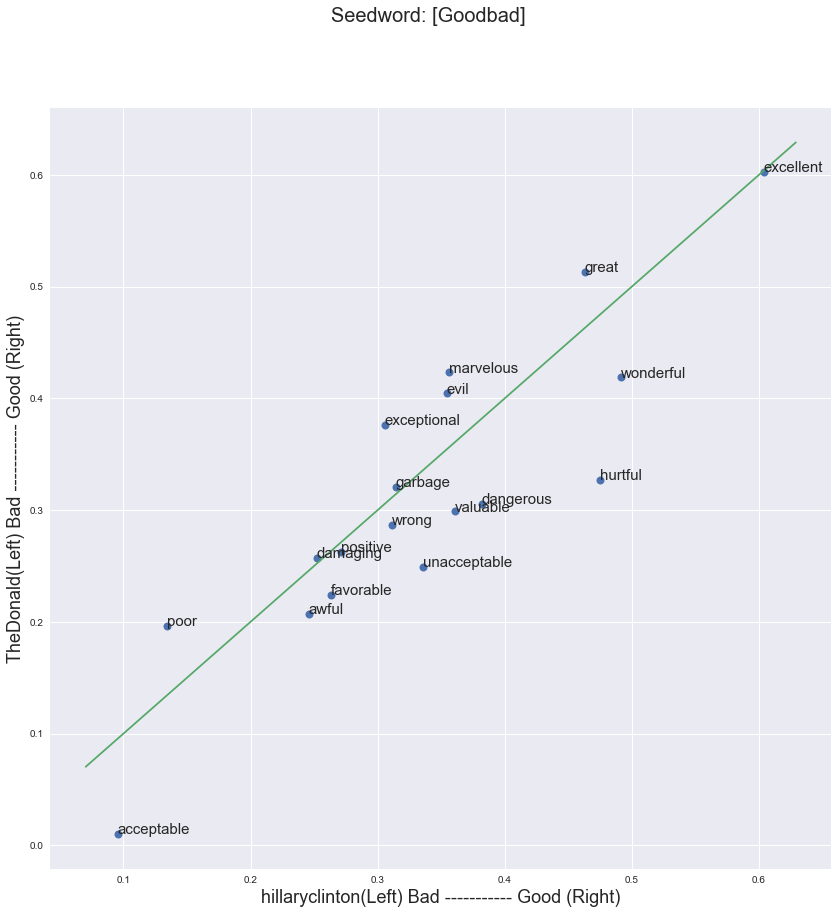

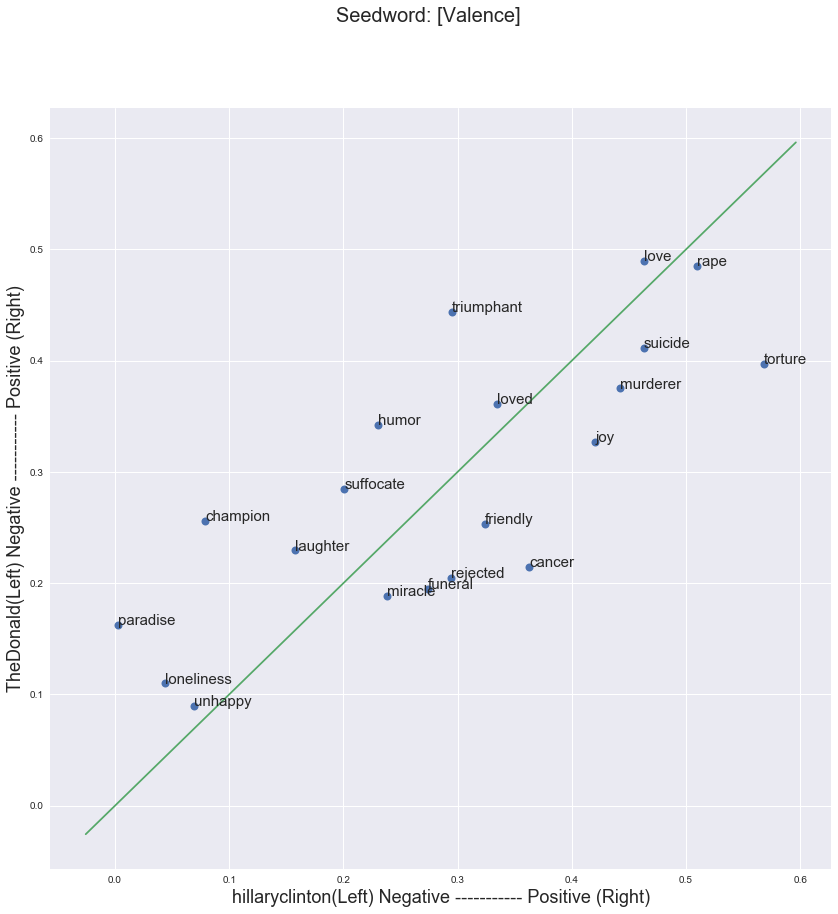

In [47]:
test_dimensions = ['goodbad', 'valence']
for dimension in test_dimensions:
    df = pd.read_csv('./mapped/seed_word_mapping_hillaryclintonvsTheDonald_%s.csv' % (dimension))
#         groups = df.groupby('group')

    # Plot
    fig, ax = plt.subplots(figsize=(14, 14))
    fig.suptitle("Seedword: [%s]" % (dimension.title()), fontsize=20)
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#         for name, group in groups:
#             ax.plot(group.x, group.y, marker='o', linestyle='', ms=8, label=name)
    ax.plot(df.x, df.y, marker='o', linestyle='', ms=8)
#         ax.legend(fontsize=18) 

    for i, txt in enumerate(df.word):
        ax.annotate(txt, (df.x[i], df.y[i]), fontsize=15)

    plt.xlabel(name_base + lables[dimension], fontsize=18)
    plt.ylabel(name_other + lables[dimension], fontsize=18)

    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)

    plt.show()

## Compare two groups by one dimension (with new method)
### New method: when defining an axis by subtracting two vectors, we use vectors of two words (previously we used average vectors) which are mapped in the furthest in the line. 

In [32]:
myaxises = defaultdict(dict)
for mygroup in [name_base, name_other]:
    embed = embeds[mygroup]
    for dimension in landmarks:
        myaxis = getSimpleAxis(dimension, landmarks, embed)
        myaxises[dimension][mygroup] = myaxis

{'top': 'love', 'bottom': 'loneliness'}
{'top': 'miracle', 'bottom': 'nun'}
{'top': 'excellent', 'bottom': 'poor'}
{'top': 'fresh', 'bottom': 'coarse'}
{'top': 'faborable', 'bottom': 'objectionable'}
{'top': 'cherished', 'bottom': 'hazardous'}
{'top': 'love', 'bottom': 'unhappy'}
{'top': 'miracle', 'bottom': 'nun'}
{'top': 'excellent', 'bottom': 'poor'}
{'top': 'neat', 'bottom': 'coarse'}
{'top': 'faborable', 'bottom': 'antagonistic'}
{'top': 'snug', 'bottom': 'unsafe'}


/Users/jisunan/myRepository/code-word2vec-application/analysis/05-alltogether/groupcomparison_py3.py:1043: RuntimeWarning: invalid value encountered in true_divide
  p_hat = given / p_len


In [33]:
map_dimensions = defaultdict(dict)
map_dimensions["immigration"] = ["goodbad", "favorableunfavorable", "valence", "arousal"]
map_dimensions["terror"] = ["goodbad", "safedangerous", "valence", "arousal"]
map_dimensions["energy"] = ["goodbad", "cleanfilthy", "valence", "arousal"]
map_dimensions["racial"] = ["goodbad", "favorableunfavorable", "valence", "arousal"]
map_dimensions["economy"] = ["goodbad", "favorableunfavorable", "valence", "arousal"]

In [34]:
map_dimensions = defaultdict(dict)
for word in issues:
    map_dimensions[word] = ["goodbad", "valence"]

In [35]:
for seedword in map_dimensions:
    common_words = common_top_words[seedword]
    mkdir("./mapped")
    for dimension in map_dimensions[seedword]:
        with open("./mapped/comparison_word_mapping_%svs%s_%s_%s.csv" % (name_base, name_other, seedword, dimension), "w") as output:
            myheader = "word,x,y"
            output.write(myheader+"\n")
            for word in common_words:
                mydot = []
                for group in [name_base, name_other]:
                    axis = myaxises[dimension][group]
#                     print(dimension, word)
                    dist = map_word_on_an_axis(embeds[group], axis, word)
#                     print(dist)
                    if not np.isnan(dist):
                        mydot.append(dist)
    #                 print(mydot)
                if len(mydot) == 2:
                    output.write(",".join([word, str(mydot[0]), str(mydot[1])])+"\n")

In [36]:
lables = {}
lables["goodbad"] = "(Left) Bad ----------- Good (Right)"
lables["favorableunfavorable"] = "(Left) Unfavorable ----------- Favorable (Right)"
lables["safedangerous"] = "(Left) Dangerous ----------- Safe (Right)"
lables["cleanfilthy"] = "(Left) Filthy ----------- Clean (Right)"
lables["valence"] = "(Left) Negative ----------- Positive (Right)"
lables["arousal"] = "(Left) Calm ----------- Excited (Right)"

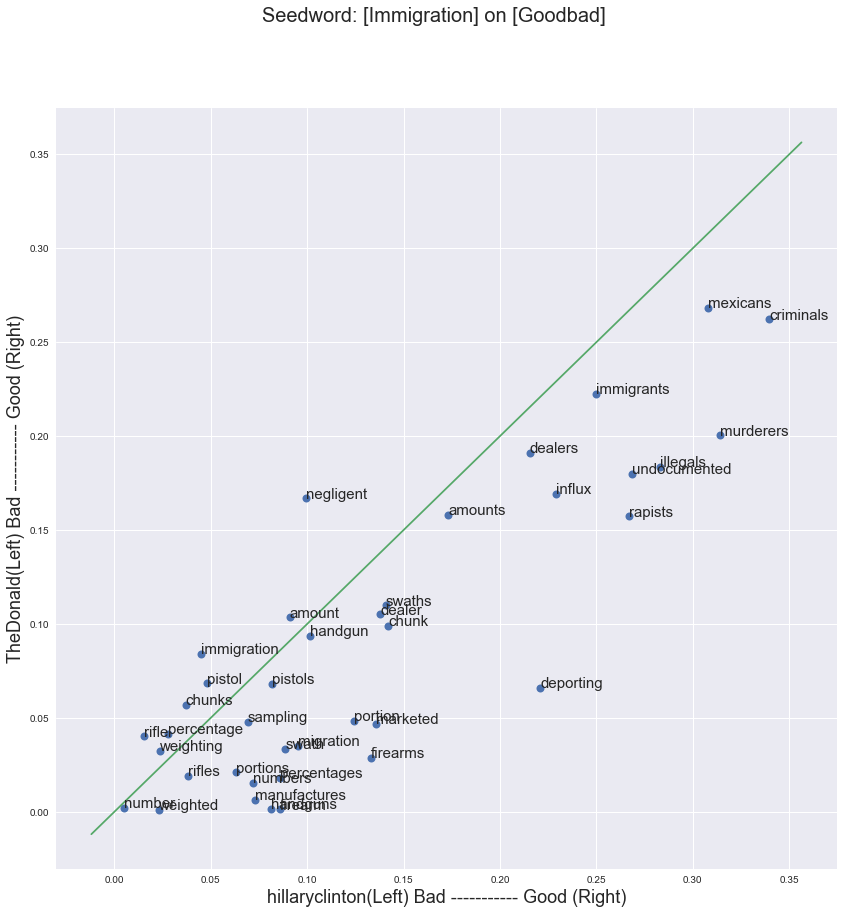

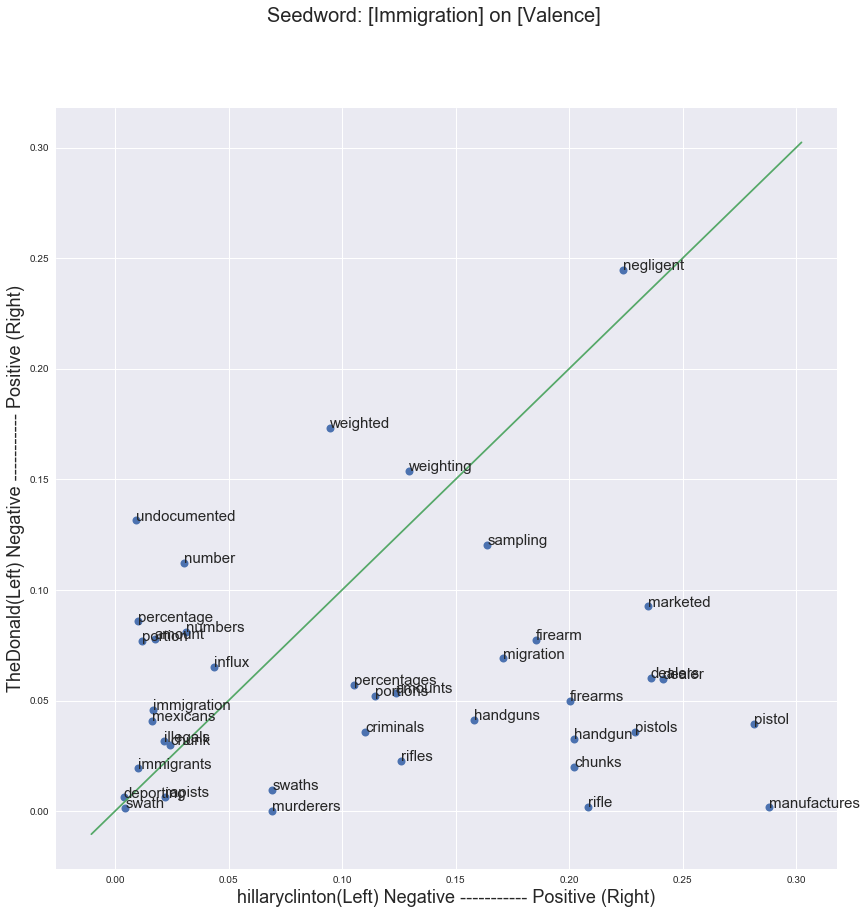

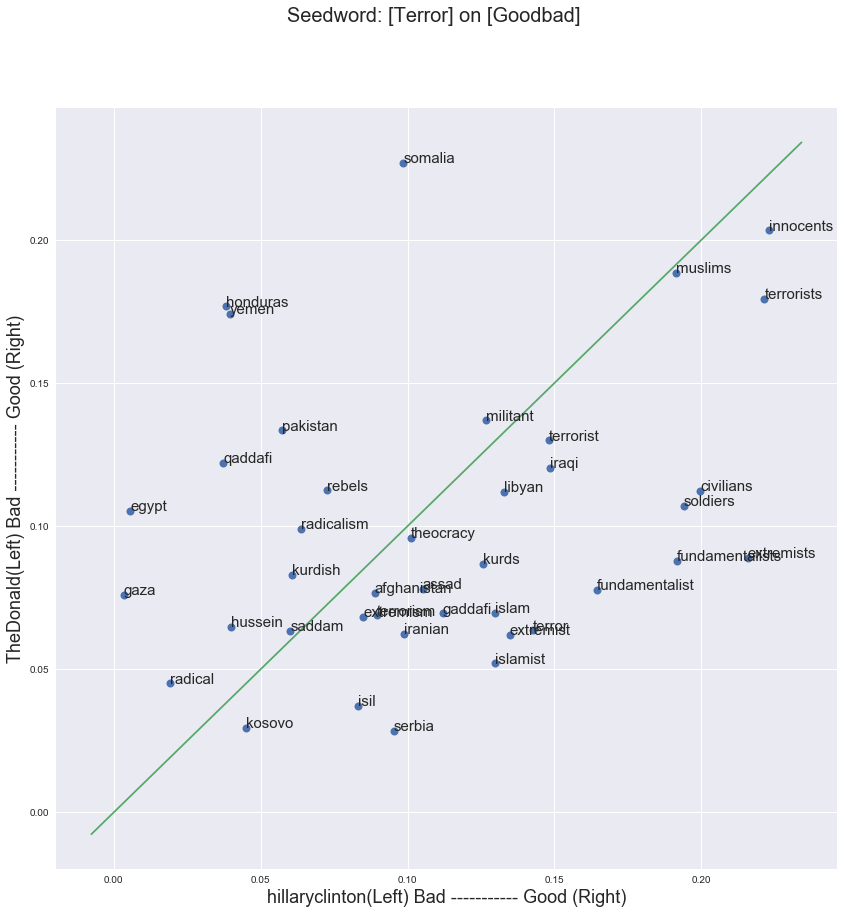

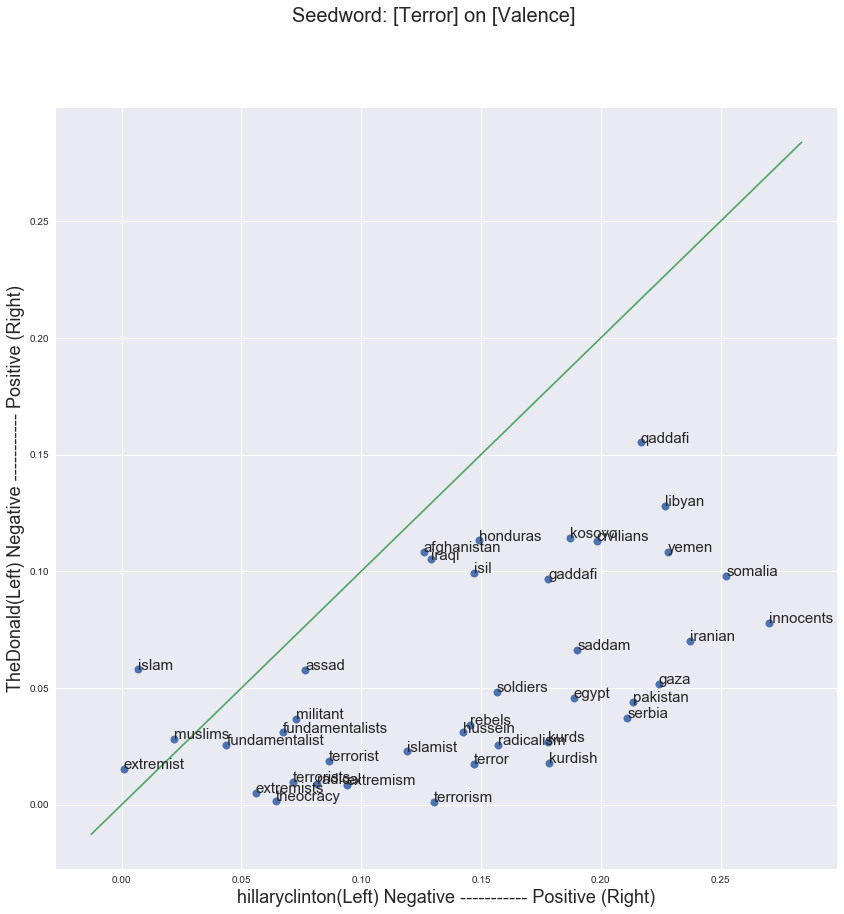

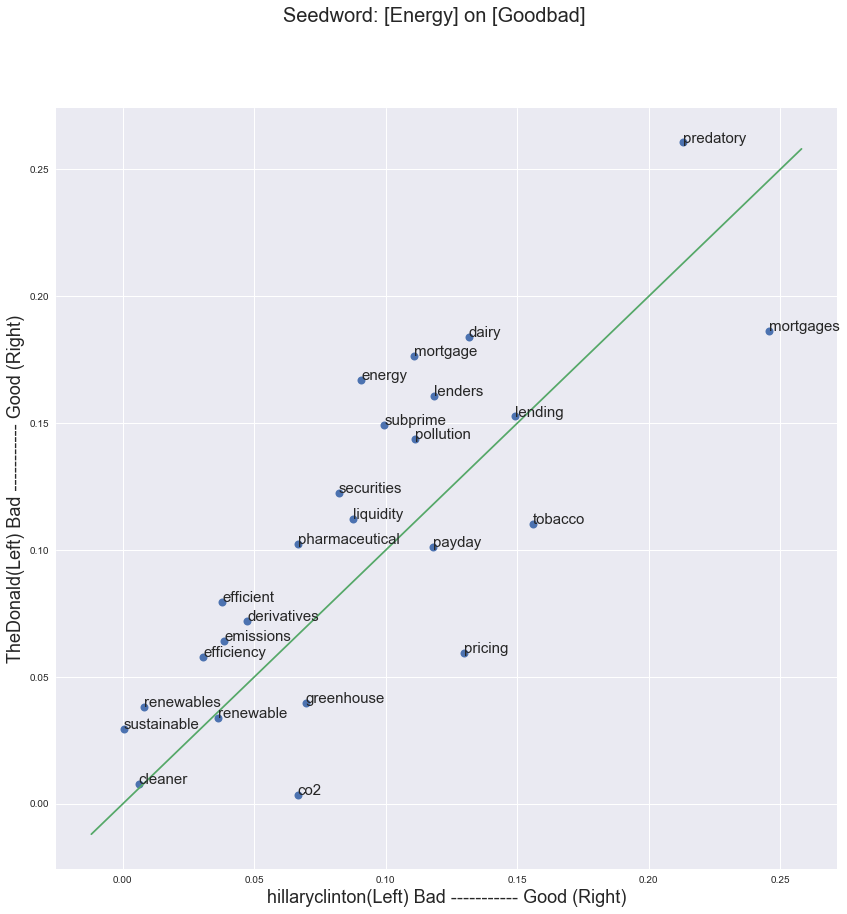

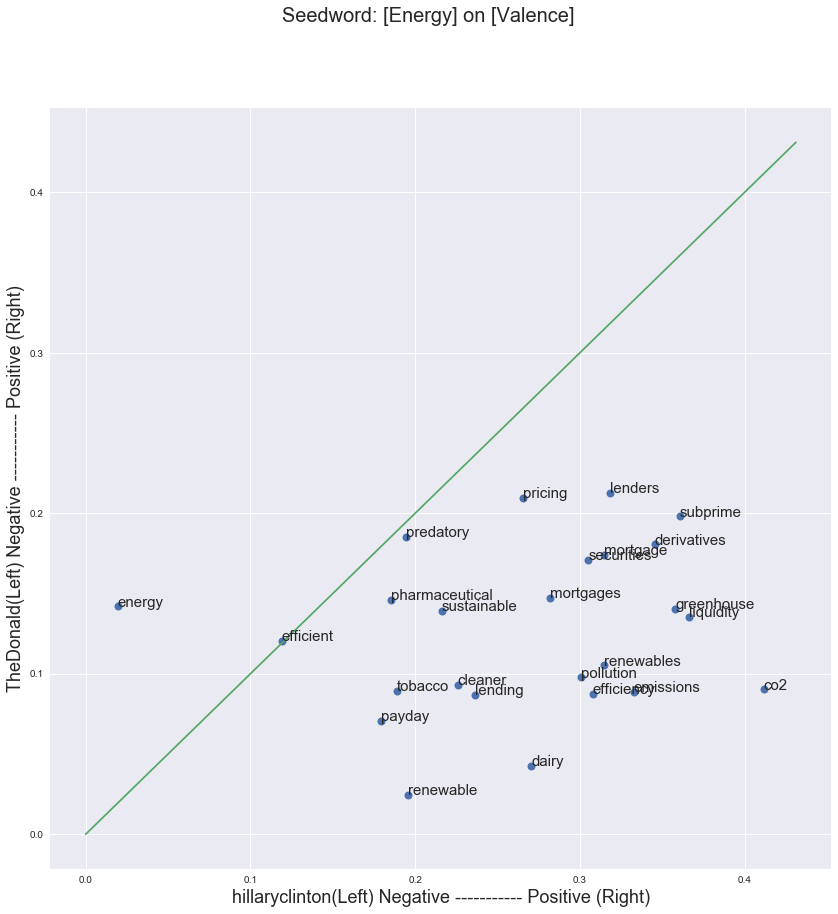

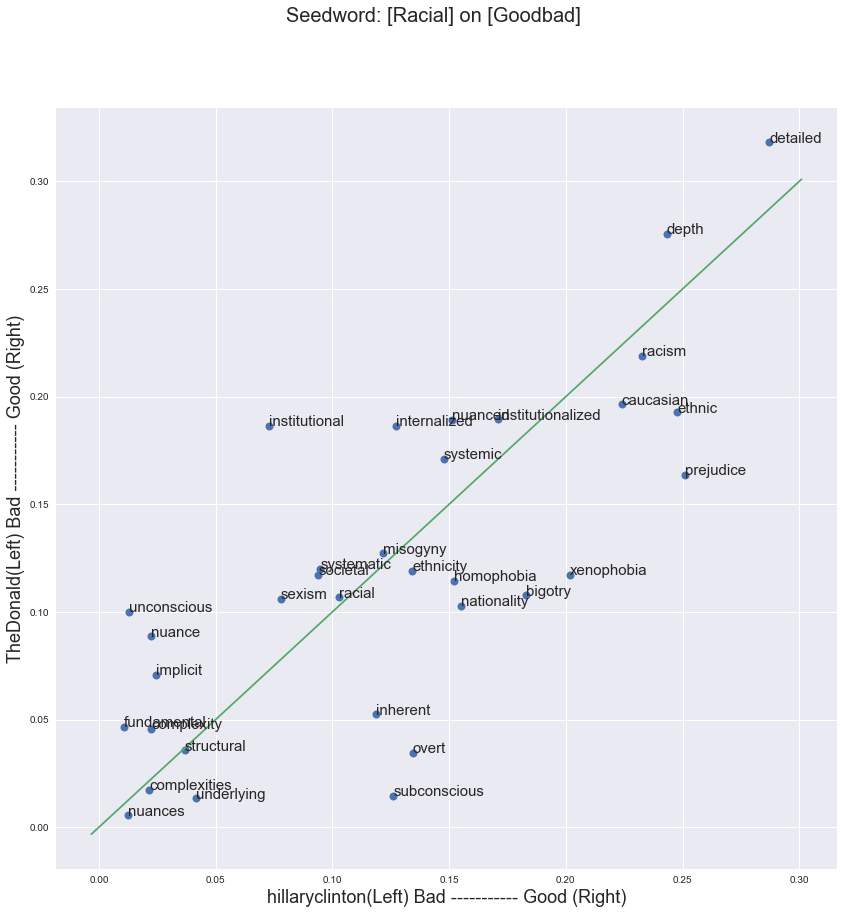

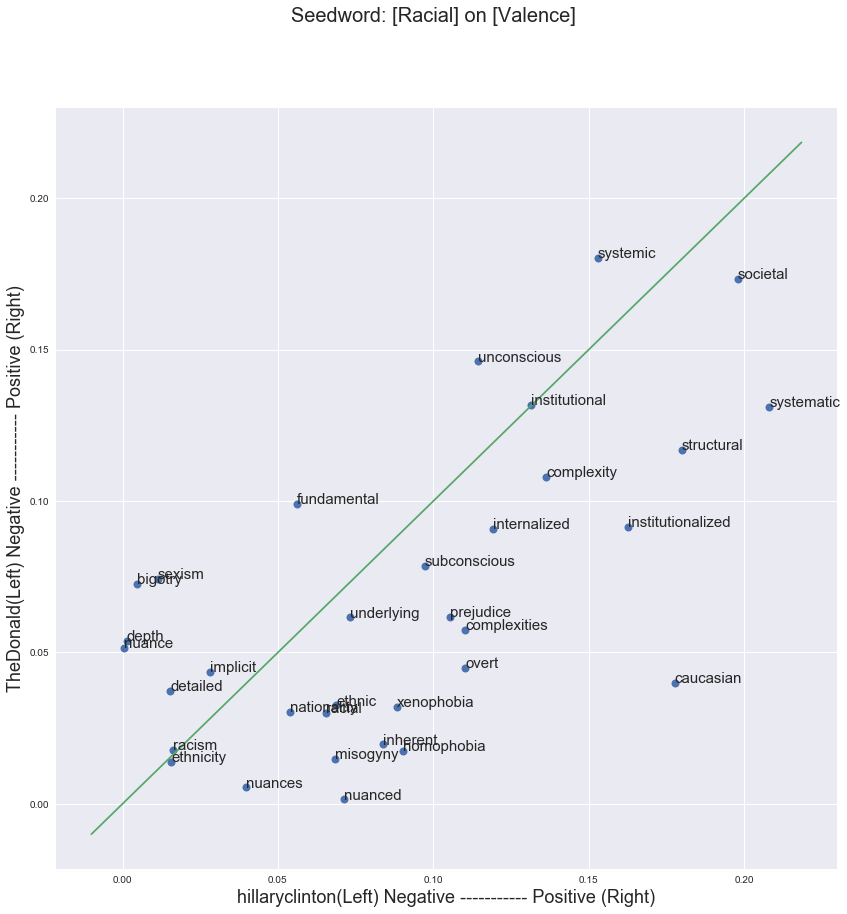

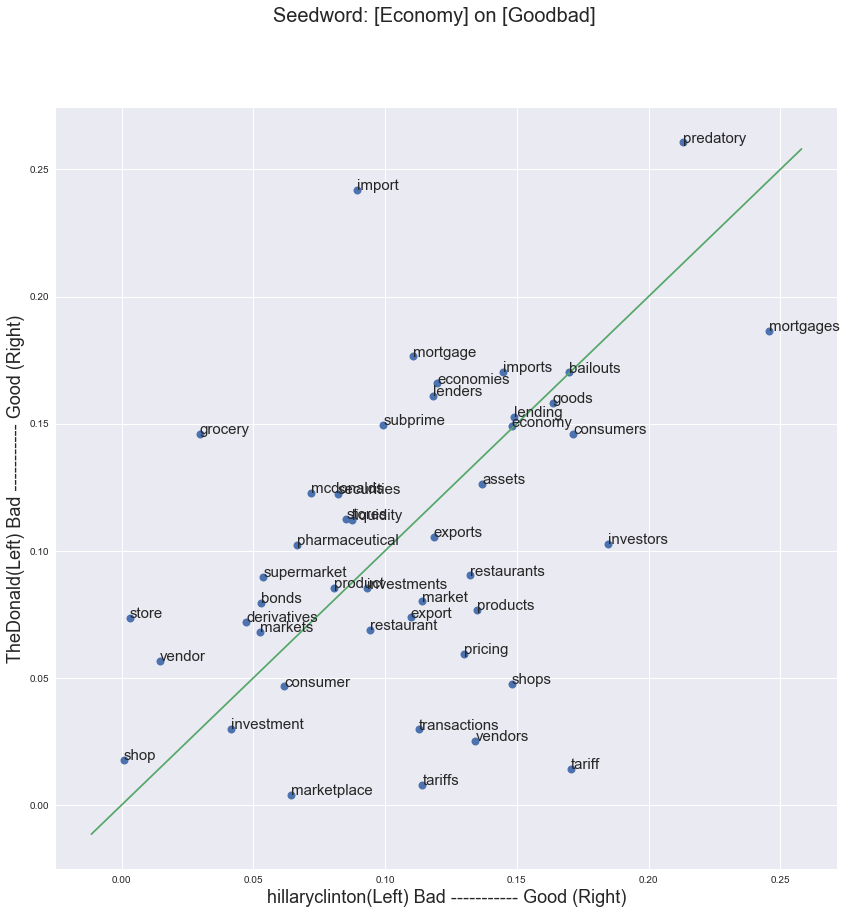

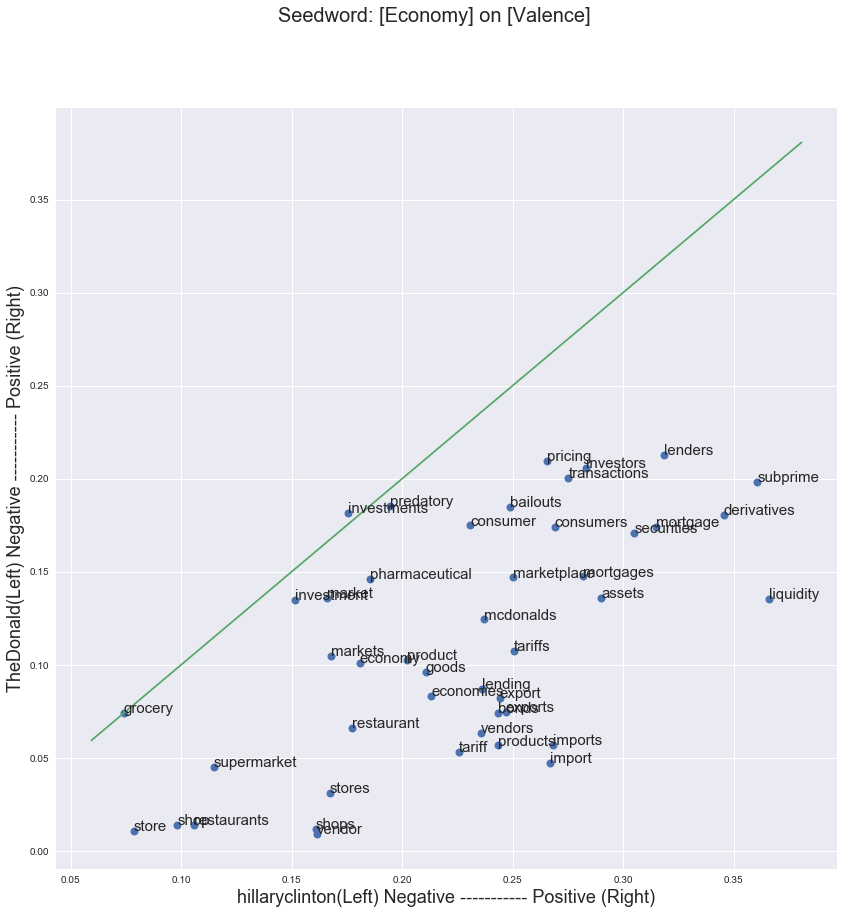

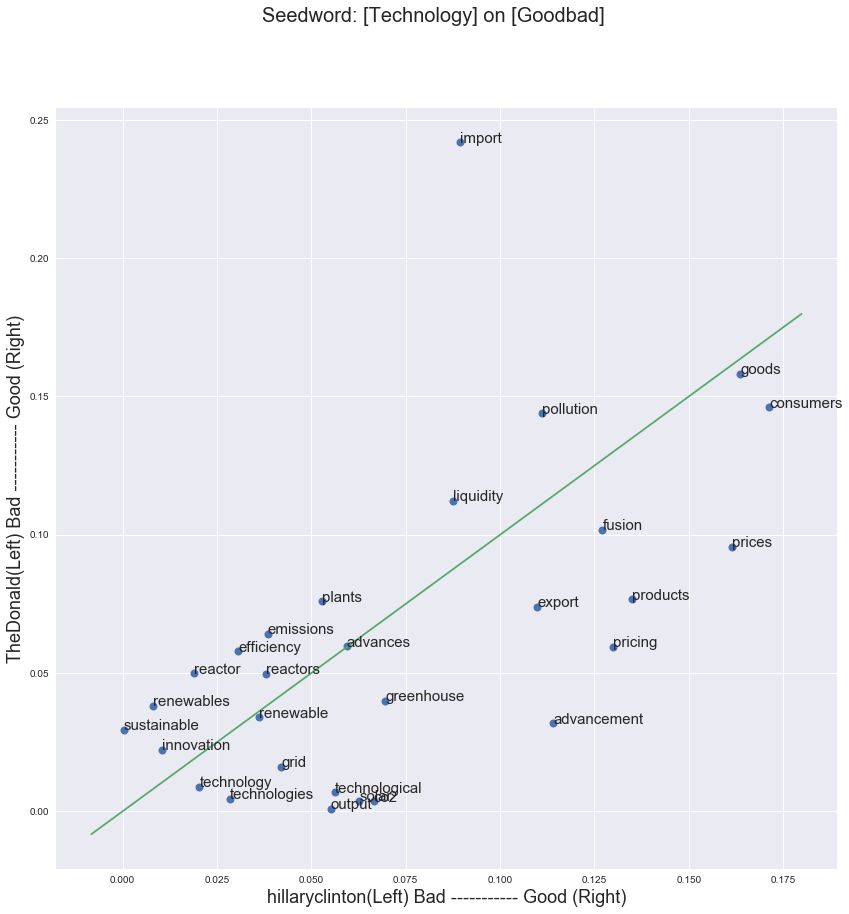

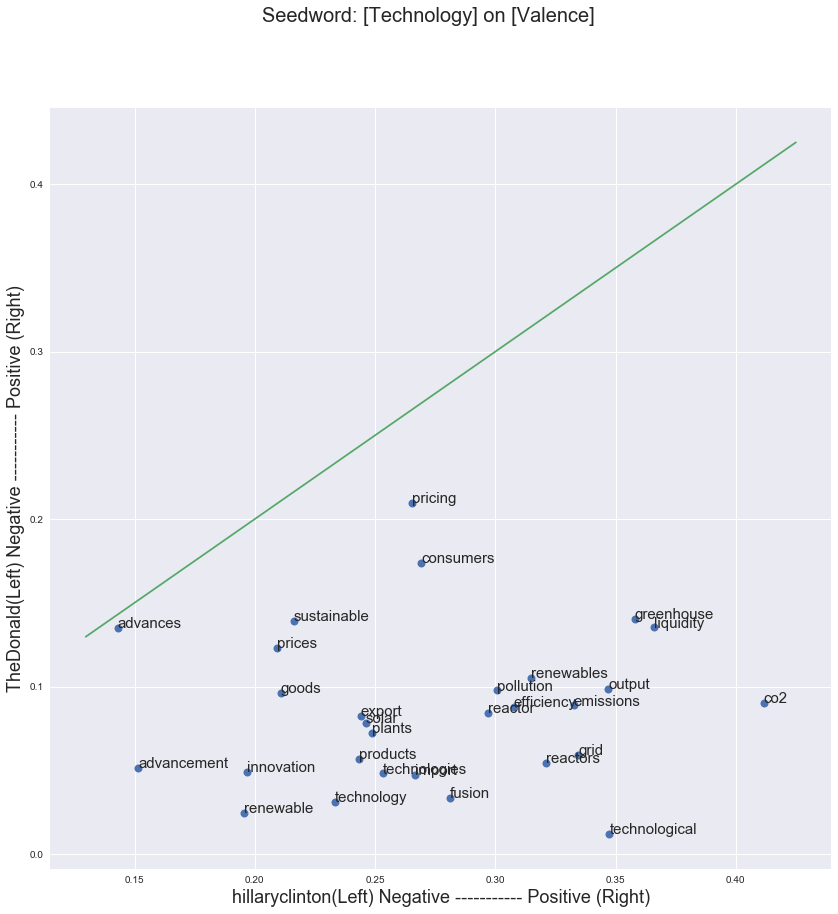

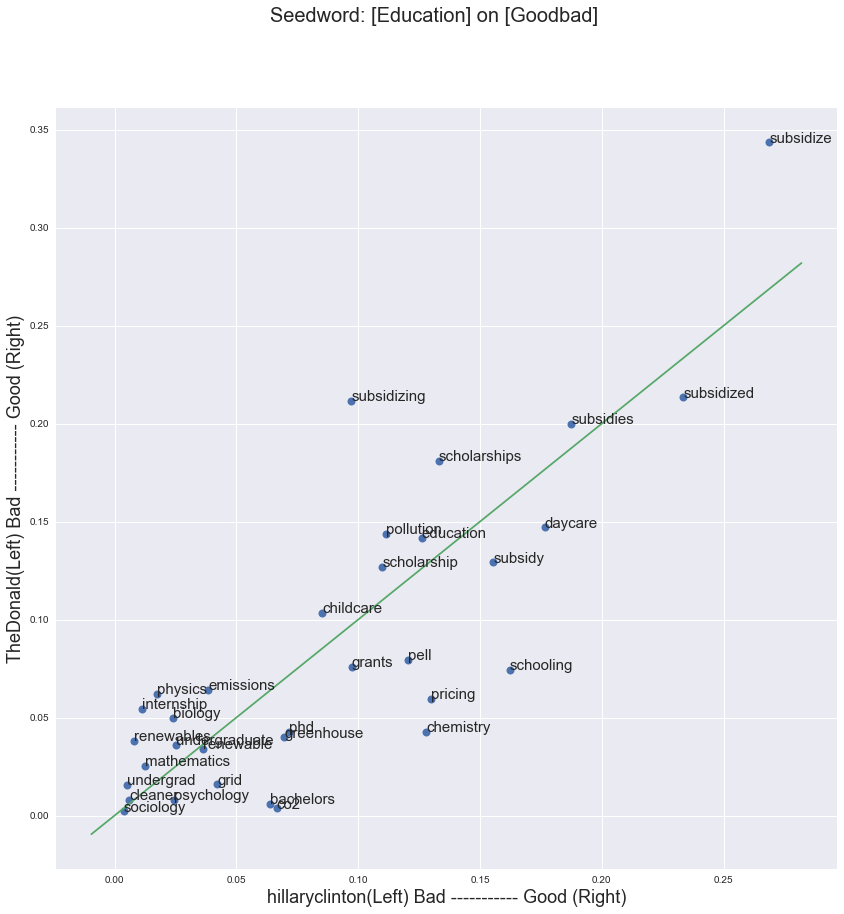

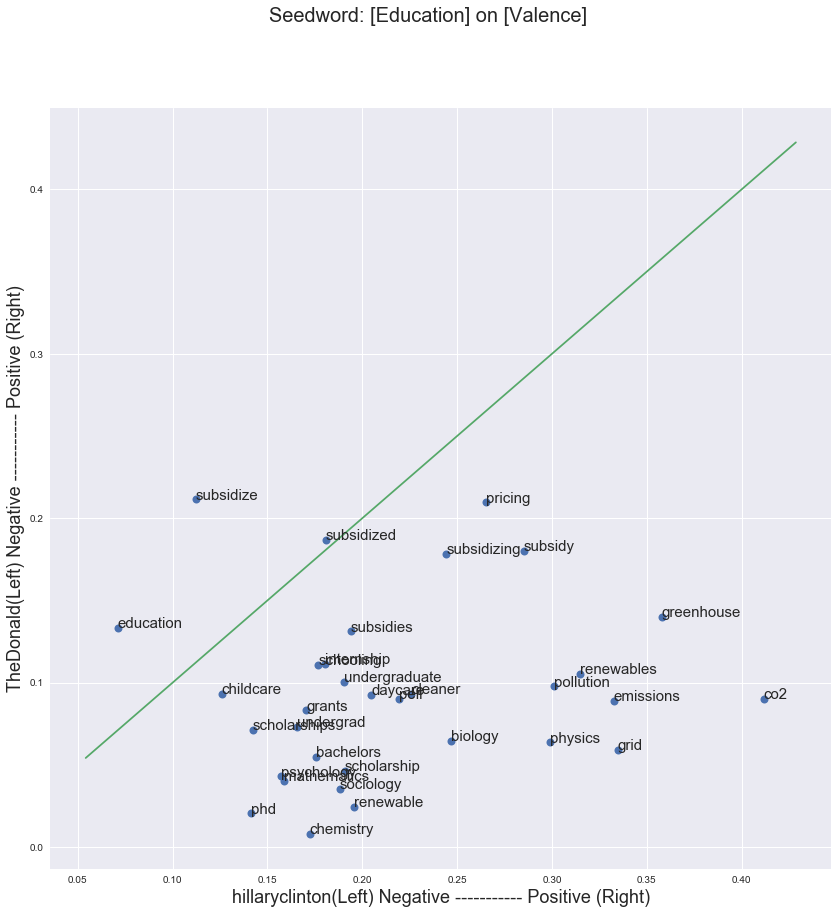

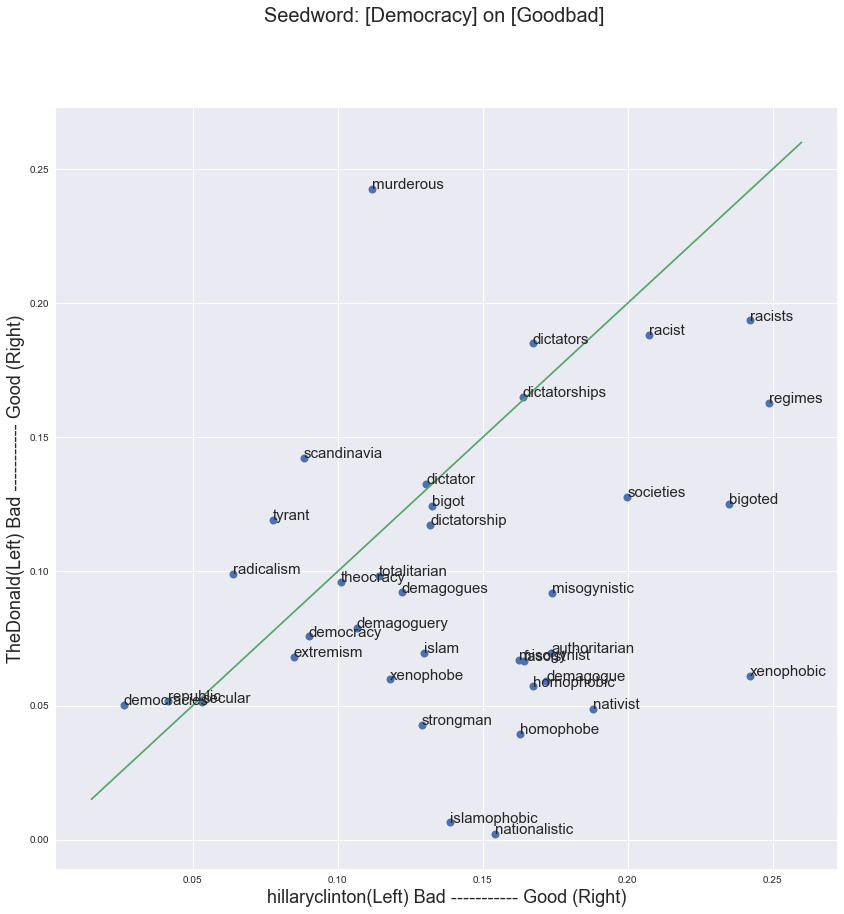

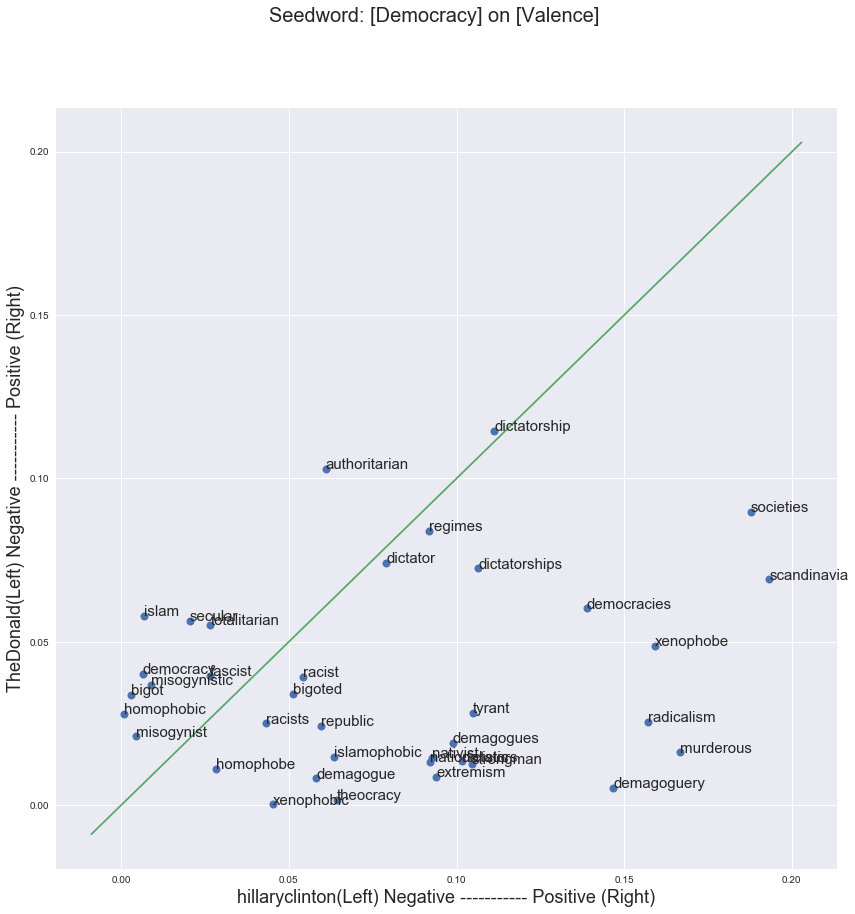

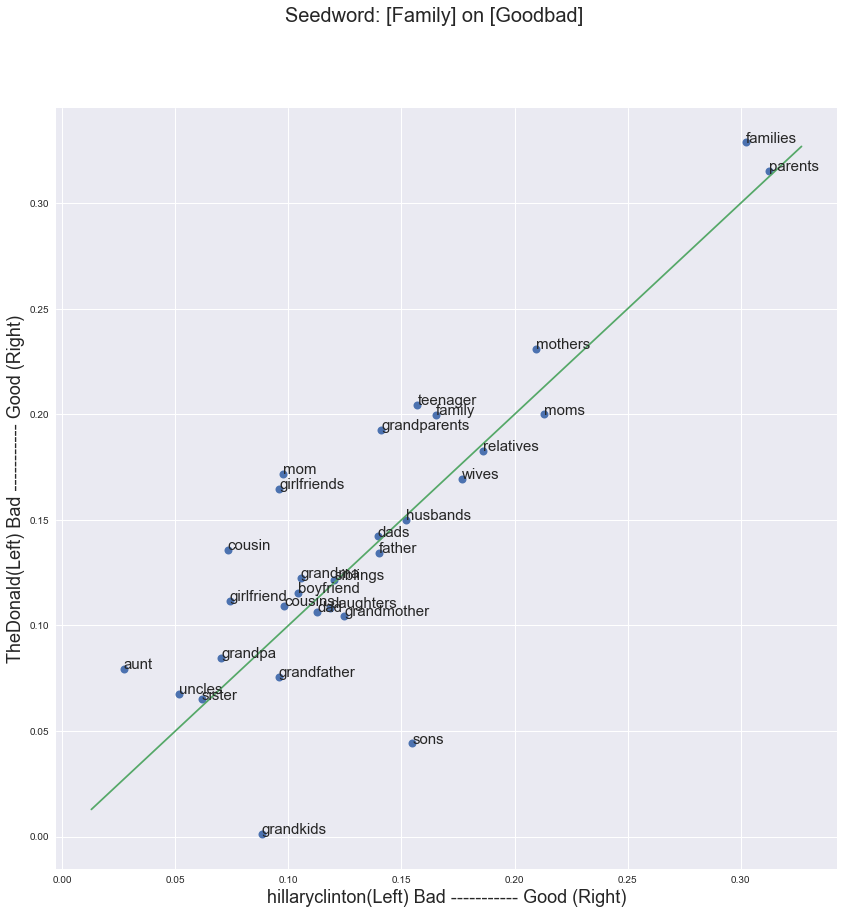

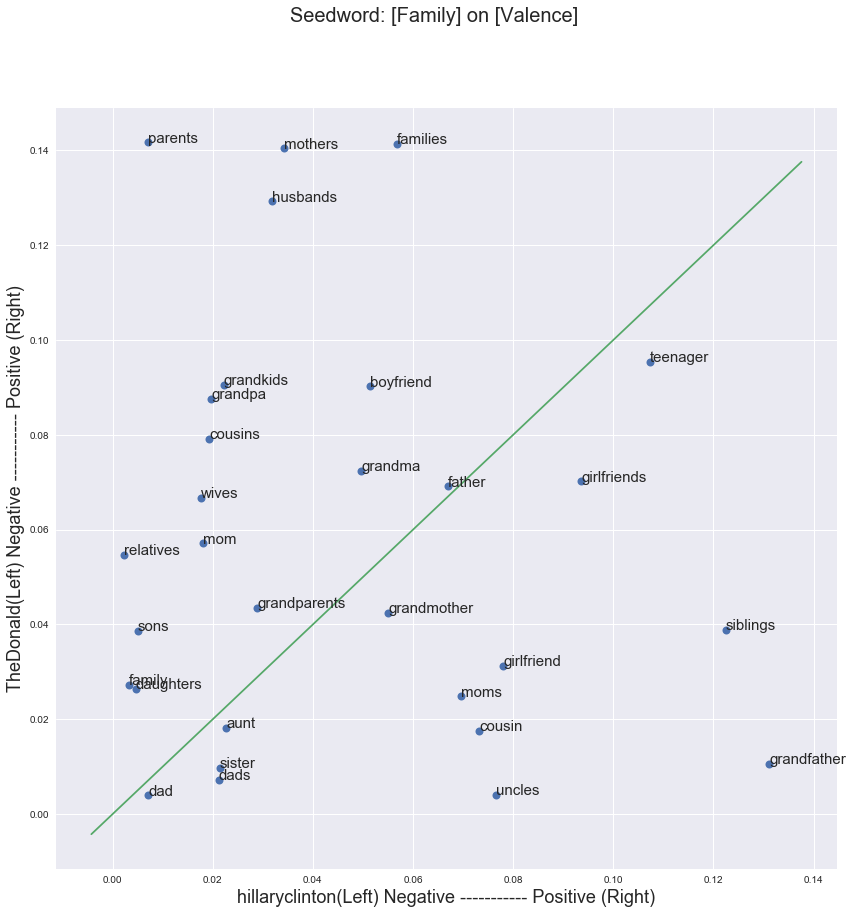

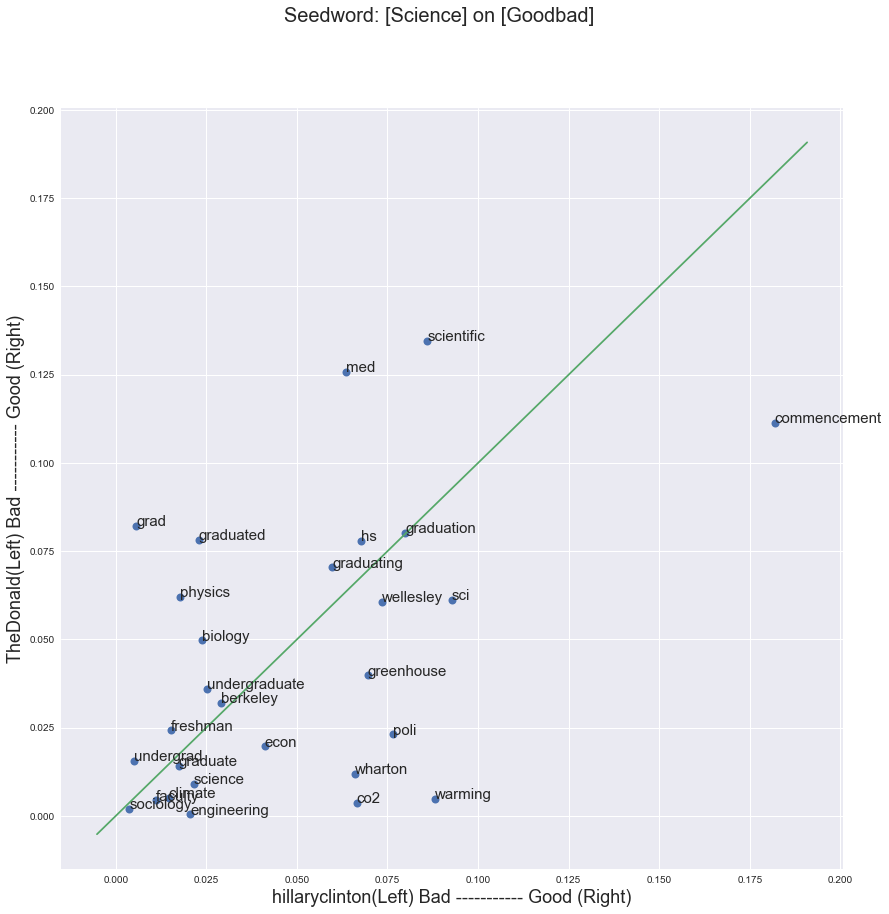

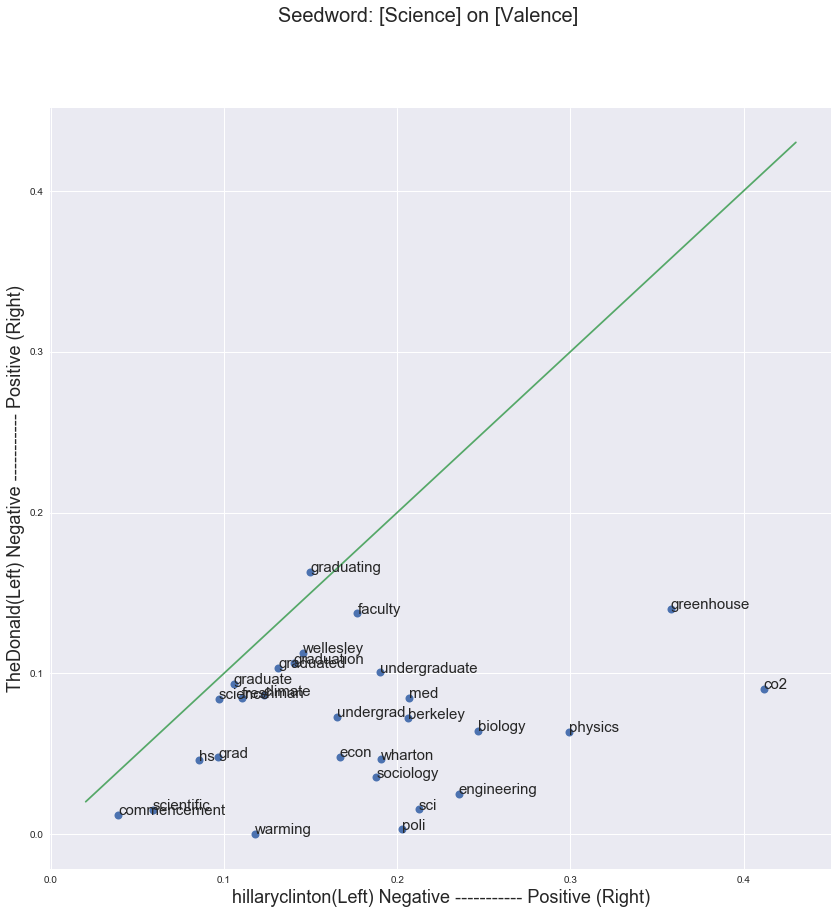

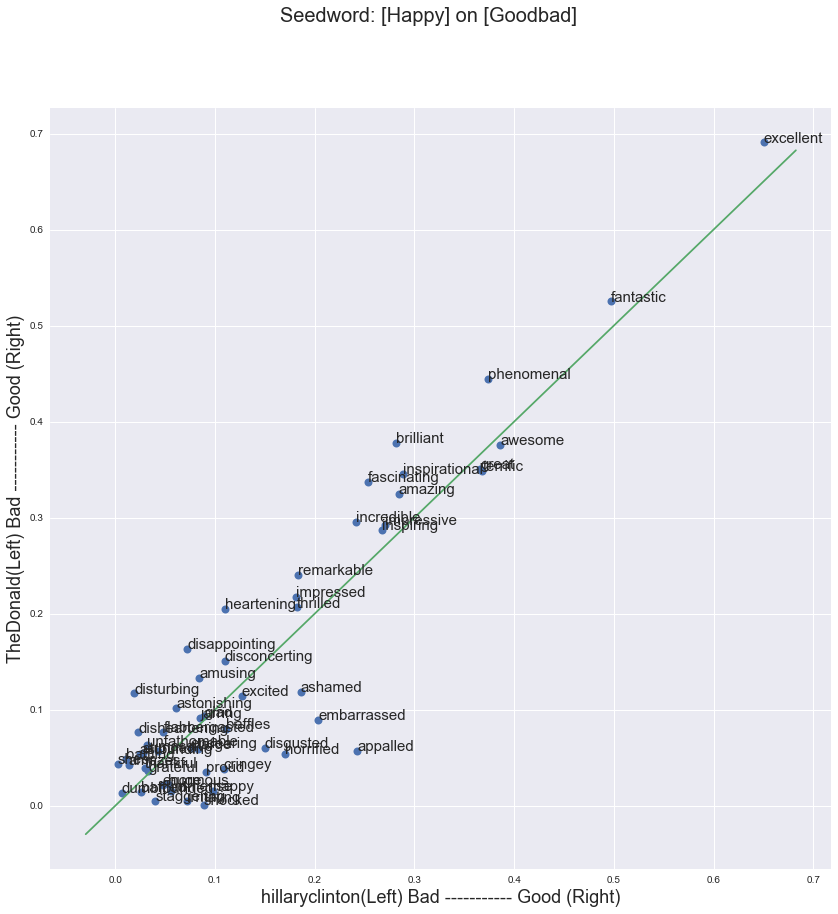

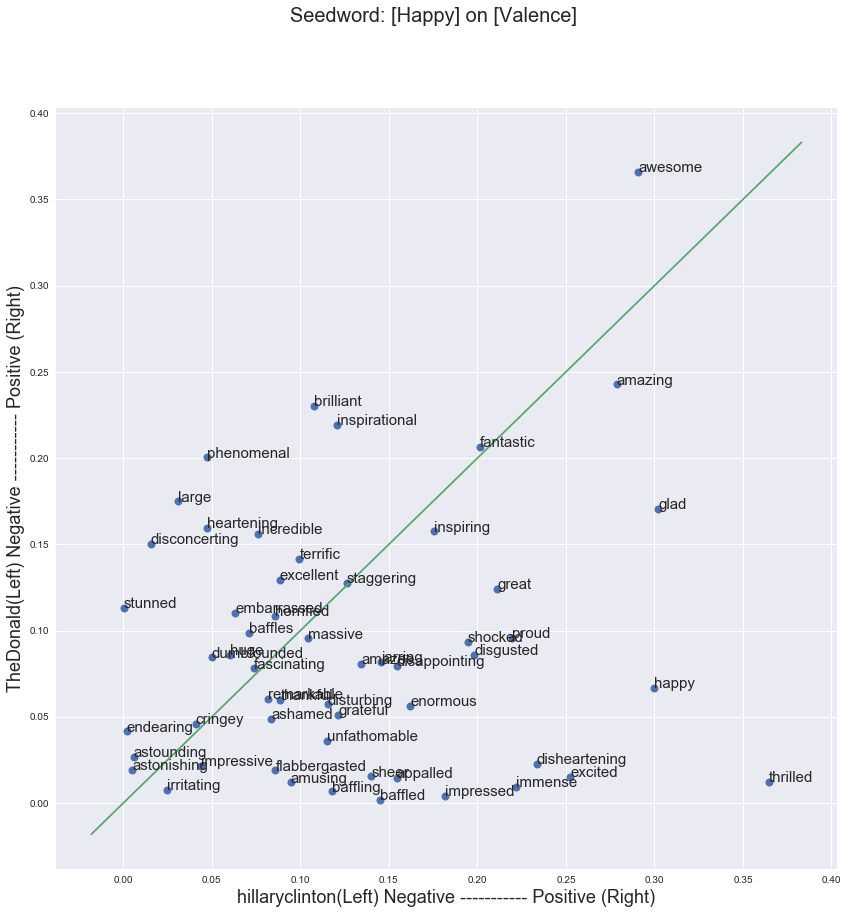

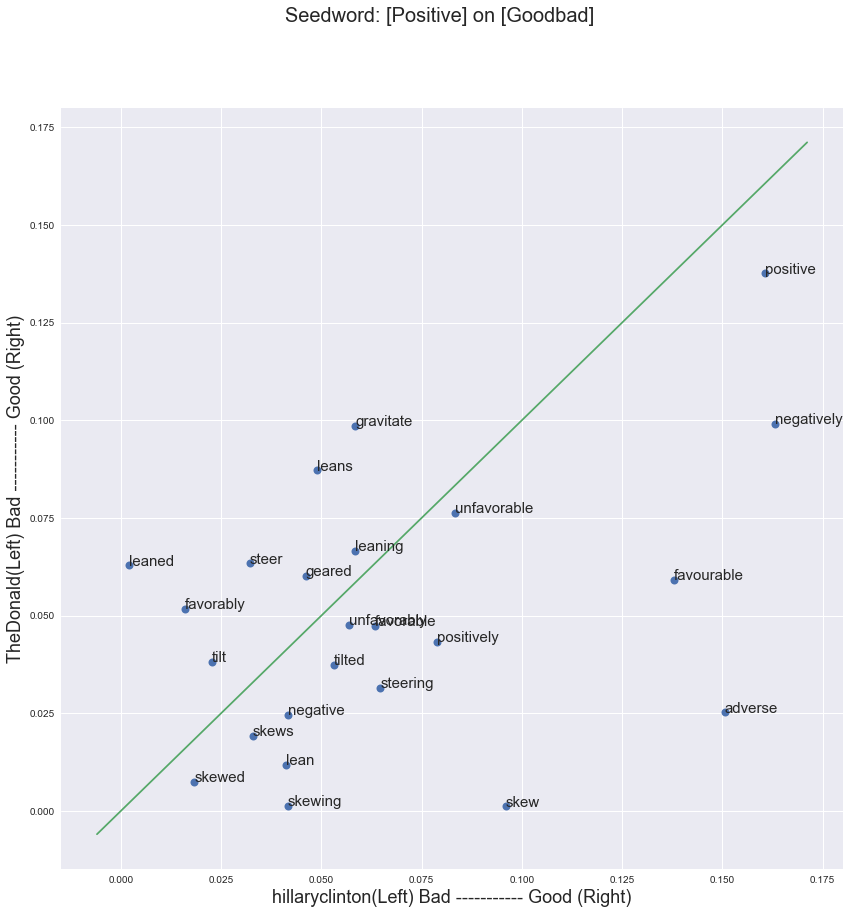

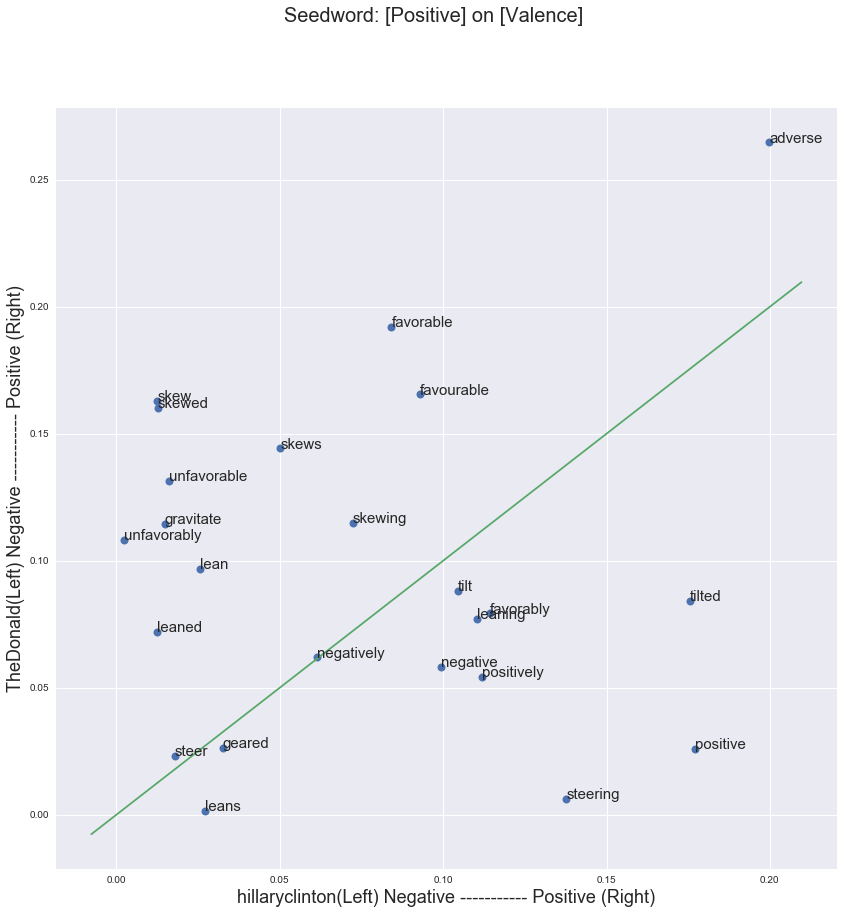

In [37]:
#     seedword = "racial"
    
for seedword in issues:
    for dimension in map_dimensions[seedword]:
        df = pd.read_csv('./mapped/comparison_word_mapping_hillaryclintonvsTheDonald_%s_%s.csv' % (seedword, dimension))
#         groups = df.groupby('group')

        # Plot
        fig, ax = plt.subplots(figsize=(14, 14))
        fig.suptitle("Seedword: [%s] on [%s]" % (seedword.title(), dimension.title()), fontsize=20)
        ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#         for name, group in groups:
#             ax.plot(group.x, group.y, marker='o', linestyle='', ms=8, label=name)
        ax.plot(df.x, df.y, marker='o', linestyle='', ms=8)
#         ax.legend(fontsize=18) 

        for i, txt in enumerate(df.word):
            ax.annotate(txt, (df.x[i], df.y[i]), fontsize=15)

        plt.xlabel(name_base + lables[dimension], fontsize=18)
        plt.ylabel(name_other + lables[dimension], fontsize=18)
        
        x = np.linspace(*ax.get_xlim())
        ax.plot(x, x)

        plt.show()

        fig.savefig('plot/%s.jpg' % (seedword))



### If wanting to compare groups by two different dimensions

In [9]:
map_dimensions = {}
map_dimensions["immigration"] = ["goodbad", "favorableunfavorable"]
map_dimensions["terror"] = ["goodbad", "safedangerous"]
map_dimensions["energy"] = ["goodbad", "cleanfilthy"]
map_dimensions["racial"] = ["goodbad", "favorableunfavorable"]
map_dimensions["economy"] = ["goodbad", "favorableunfavorable"]

In [10]:
for seedword in issues:
    common_words = common_top_words[seedword]
    mkdir("./mapped")
    with open("./mapped/comparison_word_mapping_%svs%s_%s.csv" % (name_base, name_other, seedword), "w") as output:
        myheader = "group,word,x,y"
        output.write(myheader+"\n")
        for word in common_words:        
            for group in [name_base, name_other]:
                mydot = []
                for dimension in map_dimensions[seedword]:
                    axis = myaxises[dimension][group]
#                     print(dimension, word)
                    dist = map_word_on_an_axis(embeds[group], axis, word)
#                     print(dist)
                    if not np.isnan(dist):
                        mydot.append(dist)
#                 print(mydot)
                if len(mydot) == 2:
                    output.write(",".join([group, word, str(mydot[0]), str(mydot[1])])+"\n")


In [13]:
df = pd.read_csv('./mapped/comparison_word_mapping_hillaryclintonvsTheDonald_racial.csv')

In [14]:
df.head()

,group,word,x,y
0,hillaryclinton,ethnicity,0.105358,0.071149
1,TheDonald,ethnicity,0.040424,0.057136
2,hillaryclinton,overt,0.259426,0.202464
3,TheDonald,overt,0.119594,0.057693
4,hillaryclinton,complexities,0.076882,0.162055


In [15]:
lables = {}
lables["immigration"] = ["(Left) Bad ----------- Good (Right)", "(Left) Unfavorable ----------- Favorable (Right)"]
# lables["immigration"] = ["(Left) Negative ----------- Positive (Right)", "(Left) Calm ----------- Excited (Right)"]
# lables["immigration"] = ["(Left) Unfavorable ----------- Favorable (Right)", "(Left) Unfavorable ----------- Favjorable (Right)"]
lables["terror"] = ["(Left) Bad ----------- Good (Right)", "(Left) Dangerous ----------- Safe (Right)"]
lables["energy"] = ["(Left) Bad ----------- Good (Right)", "(Left) Filthy ----------- Clean (Right)"]
lables["racial"] = ["(Left) Bad ----------- Good (Right)", "(Left) Unfavorable ----------- Favorable (Right)"]
lables["economy"] = ["(Left) Bad ----------- Good (Right)", "(Left) Unfavorable ----------- Favorable (Right)"]

In [ ]:
for seedword in issues:
    df = pd.read_csv('./mapped/comparison_word_mapping_hillaryclintonvsTheDonald_%s.csv' % (seedword))
    groups = df.groupby('group')

    # Plot
    fig, ax = plt.subplots(figsize=(20, 20))
    fig.suptitle("Seedword: [%s]" % (seedword.title()), fontsize=20)
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=8, label=name)
    ax.legend(fontsize=18) 

    for i, txt in enumerate(df.word):
        ax.annotate(txt, (df.x[i], df.y[i]), fontsize=15)

    plt.xlabel(lables[seedword][0], fontsize=18)
    plt.ylabel(lables[seedword][1], fontsize=18)
    plt.show()

    fig.savefig('plot/%s.jpg' % (seedword))
